# Group Assignment: Data Preparation and Visualization

## 1. Group members

#### Group 32
- Yu-Sheng Chen
- Harsh Jatinbhai Patel
- Sai Chandra Bala
- Priyadharshini Ramesh Kumar

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

    Each member did self-study on various visualizing techniques and SQL. Each member came up with their own solution to the parts assigned to them and was later discussed altogether in meetings and ideas were shared. Overall, there was equal contribution from each member of the group.


- Chris
Collaborated with Priya on coding and visualizing data for Part 3 of the project. Our teamwork included jointly deciding on the best plot to showcase in Part 3 after analysing various plots created during exploration. I specifically crafted the box plot for Part 3, which played a crucial role in guiding the team towards the final plot choice after thorough discussions. In Part 4, helped Harsh present the interpretation of Part 3 alongside Priya. And combined everyone's work for the final draft for the Jupyter notebook.


- Harsh
Took ownership of Part 2 to create code and visual plots. Presented the interpretation of part 2 and part 3 within the context of part 4. Provided valuable input in selecting the most suitable visualization plots for part 2 after exploring different options to ensure effective presentation. Also, played a role in refining the Jupyter notebook to make it ready for submission.


- Priya
Collaborated with Chris to take responsibility for Part 3, focusing on code development and creating visualizations using data. During our initial team sync, I played a key role in consolidating everyone's contributions to produce the first draft of the Jupyter notebook. Actively participated in all parts of the project, providing valuable insights that contributed to the final versions of the code. Specifically in Part 3, Experimented with histogram visualizations by adjusting arguments in the seaborn function. Furthermore, Helped Harsh present the interpretation of Part 3 within the context of Part 4, working alongside Chris in delivering this aspect of the project.


- Sai
led the initial phase of the project and took ownership of Part 1 of the project, overseeing the delivery of code and creating data visualization plots. Additionally, I facilitated team collaboration by organizing meetings and making sure proper communication of work and ideas takes place. Furthermore, I provided the interpretation for part 4, delivering the insights for part 1.



2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.

    
- Think Carefully When Dealing With SQL Query because there are some small details that has a huge effect on the output
- Acquired skills in organizing and simplifying plots to make them ready for presentation.
- Discovered that different formats of data require specific data plots for more effective representation.
- Collaboratively sharing ideas and solutions for each question and discussing got us to the ultimate solution faster, highlighting the significance of critical thinking and teamwork.
    

***

## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. A single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. A PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [2]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@topmotordealershipcompany.com

To: datascienceteam@topmotordealershipcompany.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across states, across dealerships, and across sales channels.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Sales performance at the state level (top 5 and bottom 5 states)
2. For the best performing states, which dealerships are performing well and how are they trending?
3. In states with dealerships, how has the distribution of sales amounts changed over time for different channels (internet vs. dealership) and sales types (low, typical, high value)?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the top and bottom performing states

1. Write a SELECT query that returns the total sales amount for each state from January 1, 2016 to now.  The table should have two columns, `state` and `total_sales_amount`, with one row for each state ordered by `total_sales_amount` in *descending* order. Make sure that `total_sales_amount` is rounded appropriately.  Attribute sales to states based on the **state in which the customer that made the purchase resides**.  This way we can capture both sales made through dealerships, as well as sales made through our website, in evaluating state-level performance.  


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_state`.


3. Display the rows in `sales_by_state` corresponding to the 5 states with the **largest** total sales amount in *descending* order.


4. Display the rows in `sales_by_state` corresponding to the 5 states with the **smallest** total sales amount in *ascending* order.


5. Visualize sales performance by state for the top and bottom performing states discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [3]:
#1.1
query1 = """
        SELECT  c.state,
        ROUND(SUM(s.sales_amount::numeric)) AS total_sales_amount
        
        FROM customers AS c
        INNER JOIN sales AS s 
        ON c.customer_id = s.customer_id
        
        WHERE s.sales_transaction_date::DATE >= '2016-01-01' AND c.state IS NOT NULL
        
        GROUP BY c.state
        ORDER BY total_sales_amount DESC;
        """

In [4]:
#1.2 create dataframe
sales_by_state = pd.read_sql(query1, engine)

In [5]:
#1.3 display top 5 performing states
top_performing_state = sales_by_state.iloc[:5,:]
print("Top 5 Performing States:")
print(top_performing_state)

Top 5 Performing States:
  state  total_sales_amount
0    CA          22515321.0
1    TX          20460753.0
2    FL          15429244.0
3    NY          11466817.0
4    PA           7354694.0


In [6]:
#1.4 display bottom 5 performing states
bottom_performing_state = sales_by_state.iloc[-5:,:].sort_values(by='total_sales_amount', ascending = True )
print("Bottom 5 Performing States:")
print(bottom_performing_state)

Bottom 5 Performing States:
   state  total_sales_amount
50    WY              4700.0
49    RI              8850.0
48    VT             31415.0
47    ME            103365.0
46    SD            145199.0


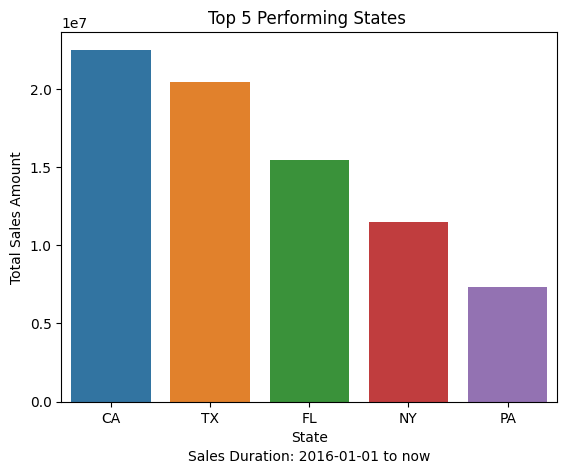

In [7]:
#1.5(1) visualize top performing states
P1 = sns.barplot(x='state', y='total_sales_amount', data=top_performing_state)
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.title("Top 5 Performing States ")
date_range_text = f"Sales Duration: 2016-01-01 to now"  
plt.annotate(date_range_text, xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10);

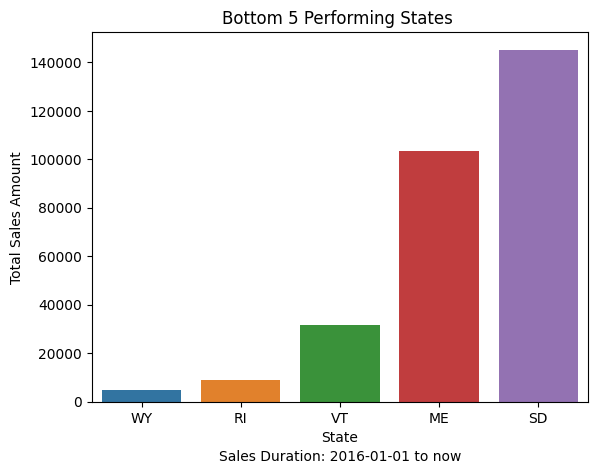

In [8]:
#1.5(2) visualize bottom performing states
P2 = sns.barplot(x='state', y='total_sales_amount', data=bottom_performing_state)
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.title("Bottom 5 Performing States ")
date_range_text = f"Sales Duration: 2016-01-01 to now"  
plt.annotate(date_range_text, xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10);

## Part 2: Top performing dealerships

Create a table and visualization of historical cumulative sales amounts by dealership from January 1, 2016 to now.  Only include dealerships located in the *top two* states determined in Part 1.  It is OK to reference these two states by their abbreviations (e.g. AL, MS, WY) in the query you will develop below since this is a one-off request.

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `dealership_id`,`state`,`sales_transaction_date`, and `cumulative_sales`.  `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for dealership identified by `dealership_id`.  There should be a row for each distinct combination of `dealership_id` and `sales_transaction_date` in the `sales` table (*hint*: window function).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_bydealership`.
    
    
   3. Appropriately visualize historical cumulative sales by dealership across sales transaction dates *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `dealership_id` and `state` are replaced with appropriate text like 'ID' and 'State', etc.). 

In [9]:
#2.1
query2 = """
        SELECT dealership_id, state, sales_transaction_date,
        sum(sales_amount) OVER w as cumulative_sales

        FROM sales AS s
        LEFT JOIN dealerships AS d USING(dealership_id)

        WHERE sales_transaction_date::DATE >= '2016-01-01' AND (d.state = 'CA' OR d.state = 'TX')

        WINDOW w AS (PARTITION BY dealership_id ORDER BY sales_transaction_date)
    

        ORDER BY dealership_id, sales_transaction_date;
         """

In [10]:
#2.2
cumulative_sales_bydealership = pd.read_sql_query(query2,engine)
print(cumulative_sales_bydealership)

      dealership_id state sales_transaction_date  cumulative_sales
0               2.0    CA    2016-01-05 00:24:43           499.990
1               2.0    CA    2016-01-07 08:07:27           999.980
2               2.0    CA    2016-01-08 06:24:34          1499.970
3               2.0    CA    2016-01-11 16:17:55          1999.960
4               2.0    CA    2016-01-11 21:05:37          2499.950
...             ...   ...                    ...               ...
3864           19.0    TX    2019-05-25 08:43:16       6384243.754
3865           19.0    TX    2019-05-25 18:51:16       6384593.744
3866           19.0    TX    2019-05-28 10:11:00       6385293.734
3867           19.0    TX    2019-05-30 23:25:58       6385643.724
3868           19.0    TX    2019-05-31 03:40:05       6385958.715

[3869 rows x 4 columns]


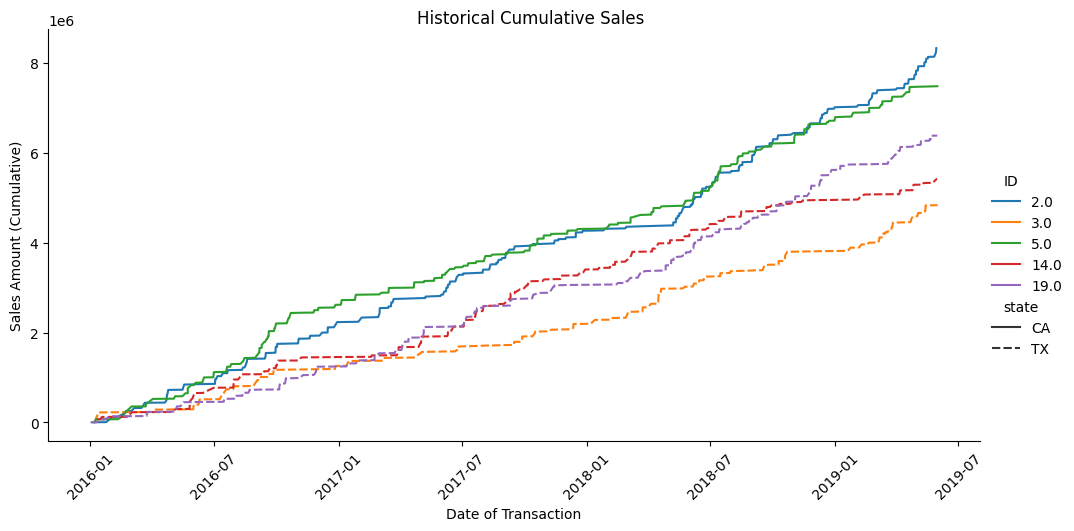

In [11]:
#2.3
cumulative_sales_bydealership.rename(columns={'dealership_id': 'ID',
                                              'sales_transaction_date': 'Date of Transaction',
                                              'cumulative_sales': 'Sales Amount (Cumulative)'},
                                               inplace=True)

# sns.set_palette('tab10')
g2 = sns.relplot(data = cumulative_sales_bydealership,
                 x = 'Date of Transaction',
                 y = 'Sales Amount (Cumulative)',
                 kind = 'line',
                 hue = 'ID',
                 style = 'state',
                 dashes = True,
                 palette = "tab10",
                 aspect = 2)

g2.fig.suptitle("Historical Cumulative Sales")
            
plt.xticks(rotation=45);


## Part 3: Sales amount by sales channel and sales type

Create tables and visualizations to compare sales amounts by sales channel for sales made on or after January 1, 2016 and before January 1, 2019.  **Only include sales made to customers that reside in a state that has a dealership.** To do this, perform the following steps:
    
   1. Write a SELECT query that returns sales with a transaction date on or after January 1, 2016 and before January 1, 2019 from the `sales` table made to customers that reside in a state that has a dealership.  This table should have the following four columns: `channel`,`sales_amount`, and `sales_type` and `sales_year`. `channel` and `sales_amount` are exactly as appears in the `sales` table. `sales_type` is a derived categorical field that takes on a value of `'High value'` when `sales_amount` is above 50000, `'Typical value'` when `sales_amount` is above 10000 but less than or equal to 50000, and `'Low value'` when `sales_amount` is less than 10000.  `sales_year` is the year from the `sales_transaction_date` field.  
   
   
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_from_dealershipstates`.
   
   
   3. Appropriately visualize the distribution of sales amounts and how it changes by `channel`, `sales_year`, and `sales_type`.  To do this, create multiple plots, one for each distinct combination of `channel` and `sales_type`.  For each plot, visualize and compare the distribution of sales amounts for each sales year (2016, 2017, 2018) by superimposing these yearly distributions on the same plot.  For example, one plot will visualize distribution of sales amounts in 2016, 2017, and 2018 for low value internet sales.  Arrange the plots so that you can see changes across `channel` and `sales_type` (*Hint: seaborn.FacetGrid*). Visualizations should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, replace variable names like `sales_year` with appropriate text like 'Year', etc.). 

In [39]:
#3.1 select query

query3 = """
        SELECT 
            s.channel, s.sales_amount, 
            -- TO_CHAR(s.sales_transaction_date, 'YYYY-MM') as sales_year,
            EXTRACT(YEAR FROM s.sales_transaction_date) AS sales_year,
            CASE WHEN s.sales_amount > 50000 THEN 'High value'
            WHEN (s.sales_amount <=50000 and s.sales_amount > 10000) THEN 'Typical value'
            ELSE 'Low value' END as sales_type
        
        FROM sales s
            INNER JOIN customers c 
                ON s.customer_id = c.customer_id
        
        WHERE
            s.sales_transaction_date::DATE >= '2016-01-01' 
            and 
            s.sales_transaction_date::DATE < '2019-01-01'
            and
            c.state IN (SELECT DISTINCT state FROM dealerships)
            
        ORDER BY sales_year;
         """

In [40]:
#3.2 create data frame
sales_from_dealershipstates = pd.read_sql_query(query3, engine)
print(sales_from_dealershipstates)

          channel  sales_amount  sales_year sales_type
0        internet       599.990      2016.0  Low value
1        internet       499.990      2016.0  Low value
2      dealership       399.992      2016.0  Low value
3        internet       449.991      2016.0  Low value
4        internet       599.990      2016.0  Low value
...           ...           ...         ...        ...
11476    internet       699.990      2018.0  Low value
11477    internet       599.990      2018.0  Low value
11478    internet       479.992      2018.0  Low value
11479    internet       599.990      2018.0  Low value
11480  dealership       499.990      2018.0  Low value

[11481 rows x 4 columns]


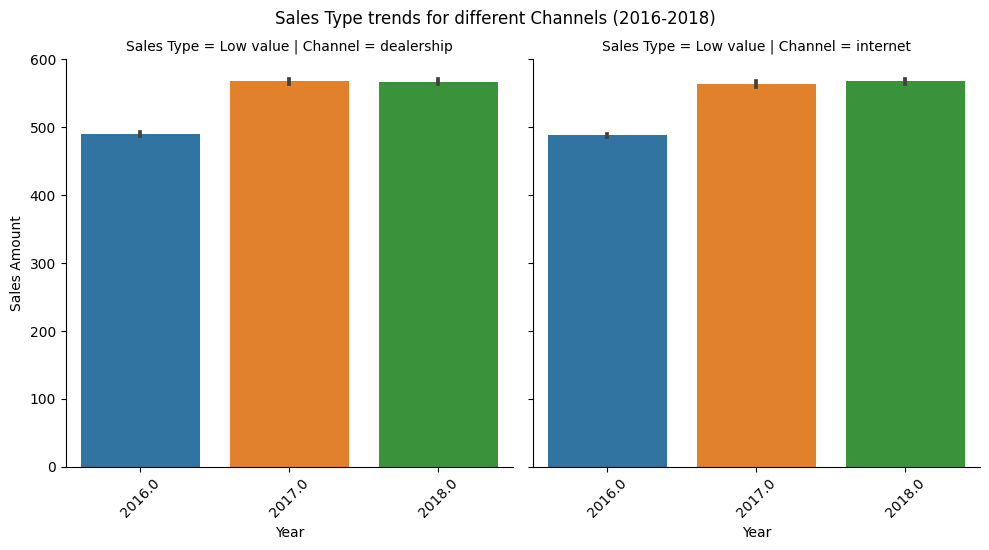

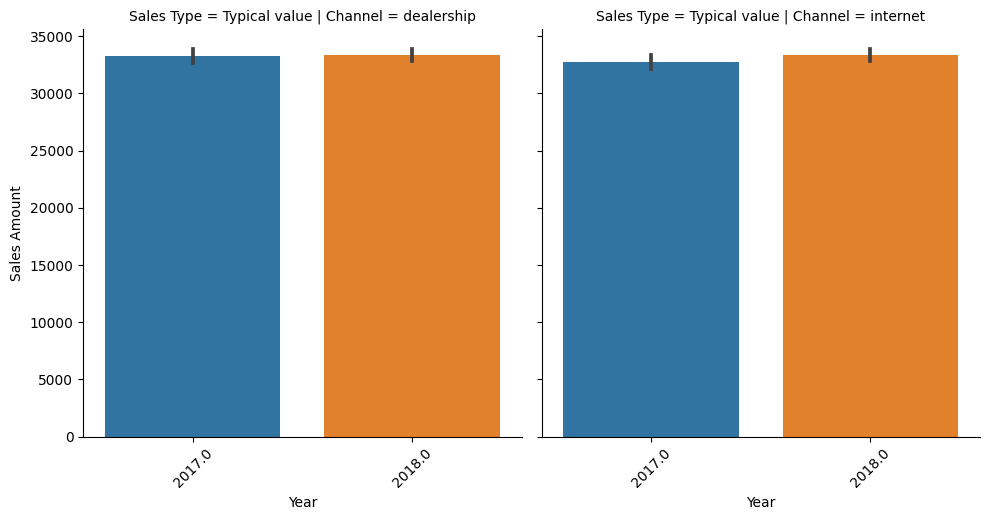

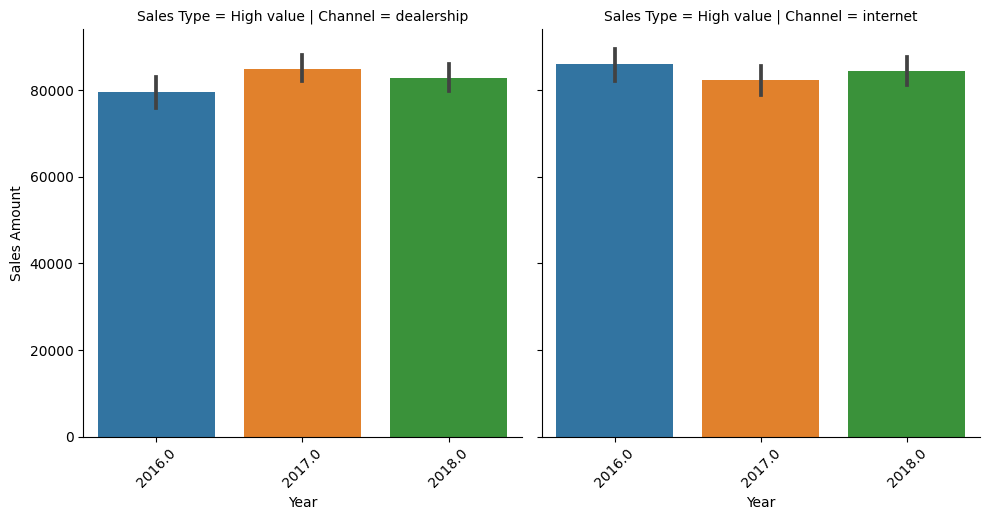

In [45]:
#3.3 visualization
import seaborn as sns
import matplotlib.pyplot as plt

sales_from_dealershipstates.rename(columns={'sales_year': 'Year',
                                            'sales_type': 'Sales Type',
                                            'sales_amount': 'Sales Amount',
                                            'channel': 'Channel'},
                                             inplace=True)


g3_1 = sns.catplot(data = sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='Low value'],
                   x = 'Year',
                   y = 'Sales Amount',
                   row = 'Sales Type',
                   col = 'Channel',
                   col_order = ["dealership","internet"],
#                    markers = True,
                   kind = 'bar')

g3_2 = sns.catplot(data = sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='Typical value'],
                   x = 'Year',
                   y = 'Sales Amount',
                   row = 'Sales Type',
                   col = 'Channel',
                   col_order = ["dealership","internet"],
#                    markers = True,
                   kind = 'bar')

g3_3 = sns.catplot(data = sales_from_dealershipstates.loc[sales_from_dealershipstates["Sales Type"]=='High value'],
                   x = 'Year',
                   y = 'Sales Amount',
                   row = 'Sales Type',
                   col = 'Channel',
                   col_order = ["dealership","internet"],
#                    markers = True,
                   kind = 'bar')

for g in [g3_1, g3_2, g3_3]:
    for ax in g.axes.flat:
#         unique_year_quarters = sorted(sales_from_dealershipstates['Year'].unique())
#         selected_labels = [label for i, label in enumerate(unique_year_quarters) if i % 4 == 0]
#         ax.set_xticks([unique_year_quarters.index(label) for label in selected_labels])
        for label in ax.get_xticklabels():
            label.set_rotation(45)

g3_1.fig.suptitle("Sales Type trends for different Channels (2016-2018)", y=1.03)
plt.show();


# ## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.


   1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
          
          
   2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.
   
   
   3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 
     
     
   4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 
   
   
   5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

### Part 4 Responses

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

1. (Part 1) What are some potential hypotheses as to why the top 5 performing states have the highest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

    1. Population Density: From the graphs, we can say that states with higher population density such as California, Texas, Florida, New York and Pennsylvania might have more potential customers, leading to higher sales. To test this hypothesis we can compare the population density of the top-performing states with lower-performing states and we can conduct a correlation analysis between population density and total sales amounts in each state. 

    2. The Economic factor can be leading factor for higher number of sales. The states with stronger economies may have higher consumer spending. By analysing economic indicators such as GDP per capita could provide insights to us to explore the correlation between GDP and total sales amounts. 

    3. Marketing, Promotion and Sales: The top-performing states might have more aggressive marketing from dealerships and in that states dealers might give more promotion and sales to boost their numbers. We can examine marketing campaign data and regional promotional activities to identify if there is any correlation with sales performance.

 2. (Part 1) What are some potential hypotheses as to why the bottom 5 performing states have the lowest sales amounts?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

    1. Market Saturation: There is a possibility that bottom-performing states may already have a high number of competitors or dealerships, leading to lower market share. To test this hypothesis we need to examine the number of dealership per state, then we have correlate with the total sales amount to get more insights.

    2. Economic Challenges: One of the reasons for less sales may be economic challenges of the states which can lead to lower consumer spending. By correlating unemployment rates and economic downturns with the sales performance we can get more information about it.

    3. One more potential reason for low performance of the sales can be consumer preferences per each region. The products offered may not align with the preferences of residents in the bottom-performing states. By conducting market research on regional preferences could give us more insight of product fit in different states. We can conduct market research to understand the need and product preferences of customers and then we can correlate it with current offering by dealership.

3. (Part 2): How would you characterize the historical performance of the dealerships visualized in Part 2 (e.g. good, bad, growing, declining, etc.)?  Describe some of the trends in relative performance over time for the dealerships.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that could influence your performance assessment. 


    1. When comparing cumulative sales of California and Texas we can observe growth in both. On further analysis we can notice that the cumulative sales for dealerships in California are greater when compared to dealerships in Texas.
    
    2. When comparing dealerships within California we can see that both dealerships perform in a similar way in comparison to the performance of the three dealerships in Texas.
    
    3. Applying a second derivative to the cumulative sales graph and examining the slopes for smaller time windows can provide more granular insights into the performance trends. This method helps in identifying periods of rapid growth, decline, or stability, offering a more nuanced view of each dealership's performance over time.

 4. (Part 3):  How does the distribution of sales amounts change from one year to the next for each channel and sale type?  Are the number of transactions for certain channels and sales types increasing or decreasing over time?  For each sale type and channel, is the distribution of sales amounts changing over time (e.g. Are the typical sales amounts for low value internet sales shifting from 2016 to 2018? If so, how are the values shifting over time?)  Be specific and cite specific elements of the visualization created in Part 3 to support your claims. 

    1. For low value sales both dealership and internet channels have an increase from 2016 to 2017. However, there is a minimal decrease in sales amount for dealership channel whereas internet channel has a minimal increase.
    
    2. For typical value sales the sales amount both channels basically stayed the same. Note that typical value sales in 2016 are not included in this data set. 
    
    3. For high value sales dealership channel reached its peak in 2017 and encounters a slight decrease from 2017 to 2018. Whereas internet channel has the highest sales amount in 2016 and the lowest in 2017.

5. (Part 3): What are some potential hypotheses as to why the distribution of sales amounts compared across channel, year, and sales type behaves in the manner you described in 4.4?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

    1. Seasonal factors or promotions might have influenced the trend in high-value sales for both dealerships and internet channels from 2016 and 2018. By Analysing sales data with external factors such as seasonal promotions, discounts and marketing campaigns can help us identify correlations with the observed trends in the graph. 
    
    2. The stable typical values which showed smaller fluctuations can be result of established customer trust, customer memberships, consistent inventory, or less susceptibility to market variations. To test this hypothesis, we need to examine dealership-specific variables (customer reviews, inventory changes) to assess their impact on the observed distribution stability. 
    
    3. The increase observed in both channels in low value sales may result from targeted promotions or product launches. By exploring external factors, customer feedback, or marketing strategies coinciding with the spikes will give us insights to understand their impact on sales.